## .INI FILE CONFIGURATION

In [2]:
import configparser
import os
vAR_read_config = configparser.ConfigParser(allow_no_value=True)
vAR_INI_FILE_PATH = os.environ.get('SCORE_PREDICTION_INI_FILE_PATH')
vAR_read_config.read(vAR_INI_FILE_PATH)
vAR_Training_Path = vAR_read_config['PATH']['Training_file']            
vAR_Test_Path = vAR_read_config['PATH']['Test_file']

## IMPORTING LIBRARIES

In [3]:
import configparser
import pandas as vAR_pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as vAR_plt

## IMPORTING TRAINING DATA

In [4]:
vAR_df=vAR_pd.read_excel(vAR_Training_Path)
vAR_df

,Id no.,Name,Assignment 1(%),Assignment 2(%),Assignment 3(%),Semester 1(%),Semester 2(%),Backlogs,Tech-fest participation,Class,...,Attendance,Quiz Voluntering,Maths Olympiad,Final grade,Science olympiad,Adaptiveness,Social activity,Primary Language(Reading &writing),Secondary Language(Reading&writing),Status
0,1,Abhishek,72,79,84,76,81,0,1,6,...,81,1,1,A,1,1,1,Y,Y,Pass
1,2,Kiran,62,56,29,42,49,1,0,7,...,54,0,0,C,0,0,0,N,N,Fail
2,3,Anu,82,89,95,92,87,0,1,6,...,93,1,0,A+,1,1,0,Y,Y,Pass
3,4,Varun,66,71,64,79,78,0,0,8,...,73,0,0,B,0,0,0,N,N,Pass
4,5,Saumya,74,85,67,83,79,0,1,7,...,82,1,0,A,0,1,1,Y,Y,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Anu,43,53,30,48,59,1,0,8,...,78,0,0,C,0,0,0,N,N,Fail
1996,1997,Om,34,46,41,39,52,1,1,7,...,49,0,0,D,0,0,1,N,N,Fail
1997,1998,Rishi,59,45,41,56,31,1,0,6,...,81,0,0,C,0,0,1,N,N,Fail
1998,1999,Rohan,92,86,81,93,89,0,1,7,...,89,1,0,A+,1,1,1,Y,Y,Pass


### Converting categorical to numerical variable

In [5]:

obj_vAR_df=vAR_df.select_dtypes(include=['object']).copy()
obj_vAR_df

,Name,Final grade,Primary Language(Reading &writing),Secondary Language(Reading&writing),Status
0,Abhishek,A,Y,Y,Pass
1,Kiran,C,N,N,Fail
2,Anu,A+,Y,Y,Pass
3,Varun,B,N,N,Pass
4,Saumya,A,Y,Y,Pass
...,...,...,...,...,...
1995,Anu,C,N,N,Fail
1996,Om,D,N,N,Fail
1997,Rishi,C,N,N,Fail
1998,Rohan,A+,Y,Y,Pass


In [6]:
obj_vAR_df[obj_vAR_df.isnull().any(axis=1)]


,Name,Final grade,Primary Language(Reading &writing),Secondary Language(Reading&writing),Status


In [7]:
obj_vAR_df["Final grade"] = obj_vAR_df["Final grade"].astype('category')
obj_vAR_df["Primary Language(Reading &writing)"]=obj_vAR_df["Primary Language(Reading &writing)"].astype('category')
obj_vAR_df["Secondary Language(Reading&writing)"]=obj_vAR_df["Secondary Language(Reading&writing)"].astype('category')
obj_vAR_df.dtypes

Name                                     object
Final grade                            category
Primary Language(Reading &writing)     category
Secondary Language(Reading&writing)    category
Status                                   object
dtype: object

In [8]:
obj_vAR_df["Final grade_cat"] = obj_vAR_df["Final grade"].cat.codes
obj_vAR_df["Primary Language(Reading &writing)_cat"] = obj_vAR_df["Primary Language(Reading &writing)"].cat.codes
obj_vAR_df["Secondary Language(Reading&writing)_cat"] = obj_vAR_df["Secondary Language(Reading&writing)"].cat.codes
obj_vAR_df

,Name,Final grade,Primary Language(Reading &writing),Secondary Language(Reading&writing),Status,Final grade_cat,Primary Language(Reading &writing)_cat,Secondary Language(Reading&writing)_cat
0,Abhishek,A,Y,Y,Pass,0,1,1
1,Kiran,C,N,N,Fail,4,0,0
2,Anu,A+,Y,Y,Pass,1,1,1
3,Varun,B,N,N,Pass,2,0,0
4,Saumya,A,Y,Y,Pass,0,1,1
...,...,...,...,...,...,...,...,...
1995,Anu,C,N,N,Fail,4,0,0
1996,Om,D,N,N,Fail,6,0,0
1997,Rishi,C,N,N,Fail,4,0,0
1998,Rohan,A+,Y,Y,Pass,1,1,1


In [9]:

obj_vAR_df["Final grade"].dtypes
obj_vAR_df["Primary Language(Reading &writing)"].dtypes
obj_vAR_df["Secondary Language(Reading&writing)"].dtypes

CategoricalDtype(categories=['N', 'Y'], ordered=False)

In [10]:
obj_vAR_df["Final grade_cat"].dtypes


dtype('int8')

In [11]:
obj_vAR_df["Primary Language(Reading &writing)_cat"].dtypes


dtype('int8')

In [12]:
obj_vAR_df["Secondary Language(Reading&writing)_cat"].dtypes

dtype('int8')

In [13]:
vAR_df = vAR_df.merge(obj_vAR_df["Final grade_cat"],left_index=True,right_index=True)
vAR_df = vAR_df.merge(obj_vAR_df["Primary Language(Reading &writing)_cat"],left_index=True,right_index=True)
vAR_df = vAR_df.merge(obj_vAR_df["Secondary Language(Reading&writing)_cat"],left_index=True,right_index=True)
vAR_df

,Id no.,Name,Assignment 1(%),Assignment 2(%),Assignment 3(%),Semester 1(%),Semester 2(%),Backlogs,Tech-fest participation,Class,...,Final grade,Science olympiad,Adaptiveness,Social activity,Primary Language(Reading &writing),Secondary Language(Reading&writing),Status,Final grade_cat,Primary Language(Reading &writing)_cat,Secondary Language(Reading&writing)_cat
0,1,Abhishek,72,79,84,76,81,0,1,6,...,A,1,1,1,Y,Y,Pass,0,1,1
1,2,Kiran,62,56,29,42,49,1,0,7,...,C,0,0,0,N,N,Fail,4,0,0
2,3,Anu,82,89,95,92,87,0,1,6,...,A+,1,1,0,Y,Y,Pass,1,1,1
3,4,Varun,66,71,64,79,78,0,0,8,...,B,0,0,0,N,N,Pass,2,0,0
4,5,Saumya,74,85,67,83,79,0,1,7,...,A,0,1,1,Y,Y,Pass,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Anu,43,53,30,48,59,1,0,8,...,C,0,0,0,N,N,Fail,4,0,0
1996,1997,Om,34,46,41,39,52,1,1,7,...,D,0,0,1,N,N,Fail,6,0,0
1997,1998,Rishi,59,45,41,56,31,1,0,6,...,C,0,0,1,N,N,Fail,4,0,0
1998,1999,Rohan,92,86,81,93,89,0,1,7,...,A+,1,1,1,Y,Y,Pass,1,1,1


## SELECTING FEATURES AND LABELS

In [14]:
vAR_Features_Train=vAR_df[['Assignment 1(%)','Assignment 2(%)','Assignment 3(%)','Semester 1(%)',
                           'Semester 2(%)','Backlogs','Tech-fest participation','Attendance',
                           'Quiz Voluntering','Maths Olympiad','Science olympiad',
                           'Secondary Language(Reading&writing)_cat','Adaptiveness','Social activity',
                           'Primary Language(Reading &writing)_cat']]
vAR_Label_Train=vAR_df['Final grade']


In [15]:
vAR_Features_Train

,Assignment 1(%),Assignment 2(%),Assignment 3(%),Semester 1(%),Semester 2(%),Backlogs,Tech-fest participation,Attendance,Quiz Voluntering,Maths Olympiad,Science olympiad,Secondary Language(Reading&writing)_cat,Adaptiveness,Social activity,Primary Language(Reading &writing)_cat
0,72,79,84,76,81,0,1,81,1,1,1,1,1,1,1
1,62,56,29,42,49,1,0,54,0,0,0,0,0,0,0
2,82,89,95,92,87,0,1,93,1,0,1,1,1,0,1
3,66,71,64,79,78,0,0,73,0,0,0,0,0,0,0
4,74,85,67,83,79,0,1,82,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,43,53,30,48,59,1,0,78,0,0,0,0,0,0,0
1996,34,46,41,39,52,1,1,49,0,0,0,0,0,1,0
1997,59,45,41,56,31,1,0,81,0,0,0,0,0,1,0
1998,92,86,81,93,89,0,1,89,1,0,1,1,1,1,1


In [16]:
vAR_Label_Train

0        A
1        C
2       A+
3        B
4        A
        ..
1995     C
1996     D
1997     C
1998    A+
1999    B+
Name: Final grade, Length: 2000, dtype: object

## TRAINING MODEL

In [17]:
vAR_model = LinearRegression()
vAR_model.fit(vAR_Features_Train,obj_vAR_df["Final grade_cat"])


LinearRegression()

### PLOTTING TRAINING DATA

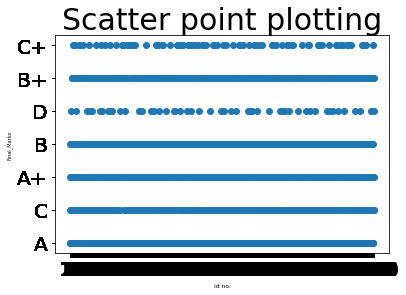

In [19]:
x=vAR_df.iloc[:,0]
y=obj_vAR_df["Final grade"]
vAR_plt.scatter(x, y)
vAR_plt.xticks((x),size=20)
vAR_plt.yticks((y),size=20)
vAR_plt.title('Scatter point plotting',size=30)
vAR_plt.xlabel('id no.',size=6)

vAR_plt.ylabel('Final_Marks',size=5)
vAR_plt.rc('figure', figsize=(60,80))
vAR_plt.show()


## GRADIENT DESCENT IMPLEMENTATION

In [20]:
m = 0
b = 0
x=vAR_df.iloc[:,0]
y=obj_vAR_df["Final grade_cat"]
L = 0.01 # The learning Rate
epochs = 107  # The number of iterations to perform gradient descent

n = len(vAR_df) # Number of elements in training data
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + b  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_b = (-2/n) * sum(y - Y_pred)  # Derivative wrt b
    m = m - L * D_m  # Update m
    b = b - L * D_b  # Update b




2.847450711862668e-05
1.8985112556278132


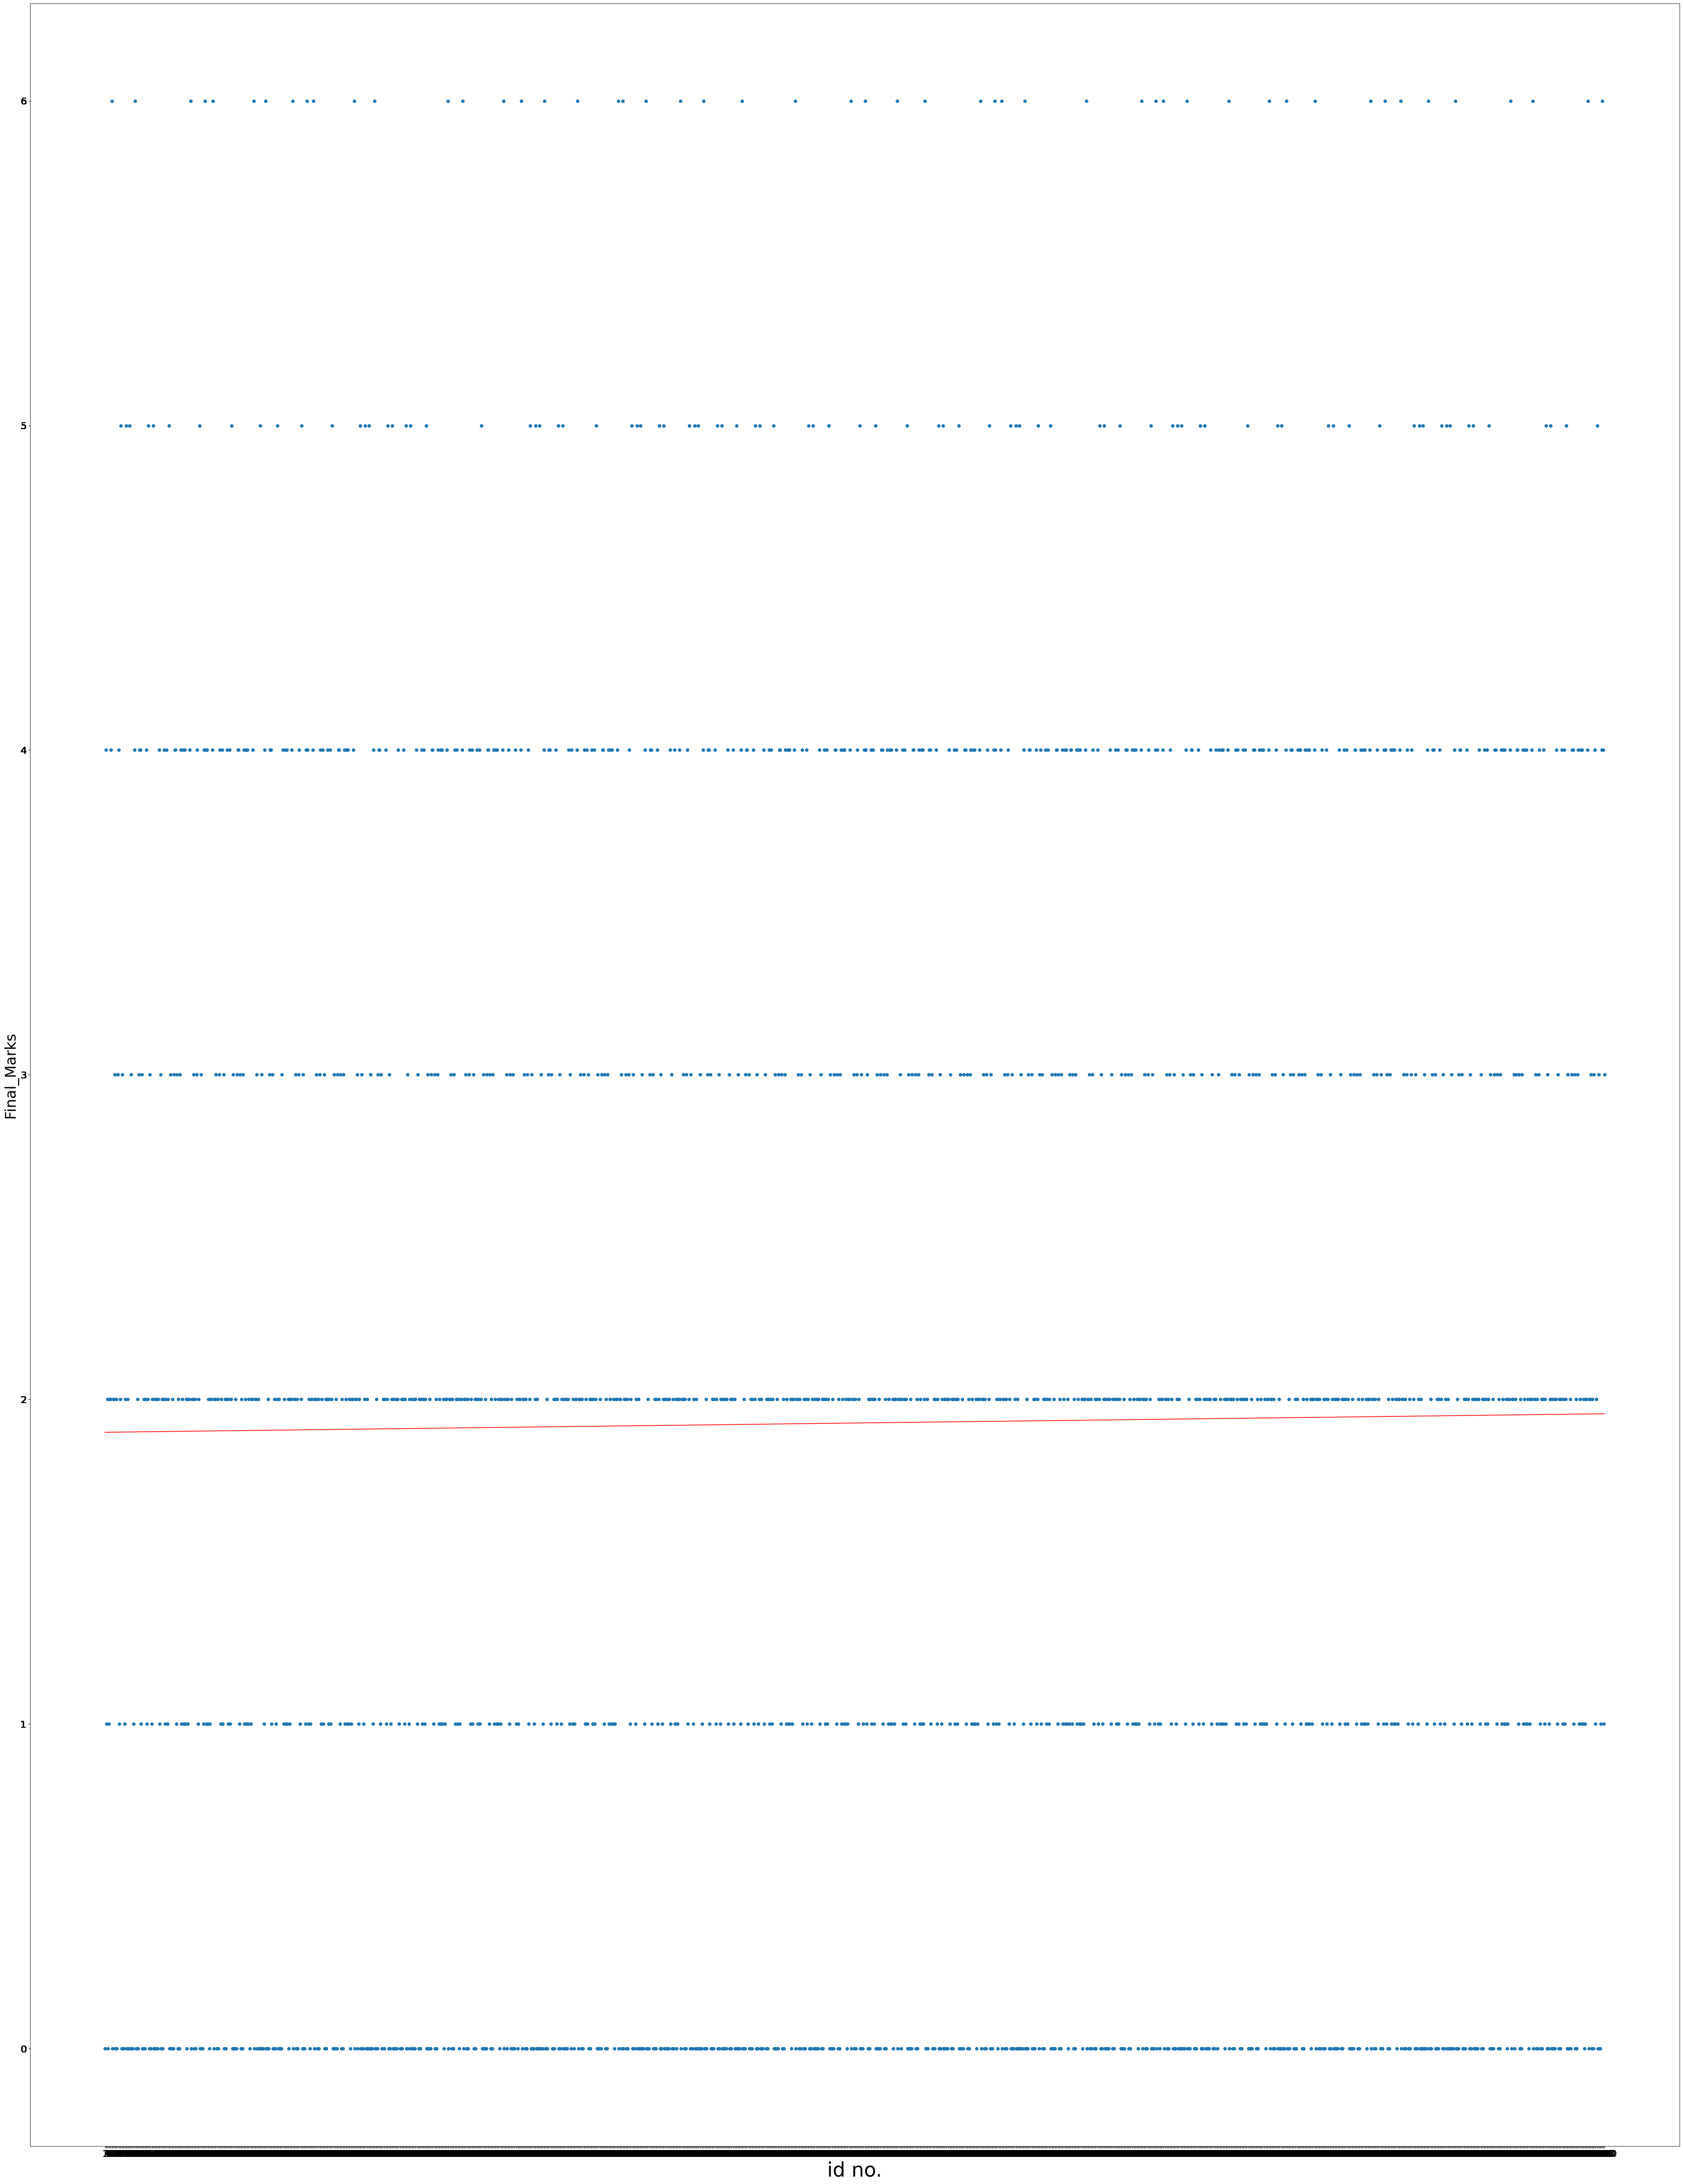

In [21]:
x=vAR_df.iloc[:,0]
y=obj_vAR_df["Final grade_cat"]
vAR_plt.scatter(x, y)
vAR_plt.xlabel('id no.',size=40)
vAR_plt.ylabel('Final_Marks',size=30)
vAR_plt.rc('figure', figsize=(40,60))
vAR_plt.xticks((x),size=20)
vAR_plt.yticks((y),size=20)
m, b = np.polyfit(x, y,1)
print(m)
print(b)
vAR_plt.plot(x, m*x + b,"r")
vAR_plt.rc('figure', figsize=(60,80))

## REVIEWING LEARNING ALGORITHM

In [32]:
y_pred=vAR_model.predict(vAR_Features_Train)


## ACCURACY

In [33]:
accuracy=vAR_model.score(vAR_Features_Train,obj_vAR_df["Final grade_cat"])
accuracy=accuracy*100
accuracy

87.78502903674217

## CALCULATING SUM SQUARE ERROR

In [35]:
#finding sum square error
sse=(obj_vAR_df["Final grade_cat"]-y_pred)**2
sse

0       0.399025
1       0.256623
2       0.007546
3       0.640882
4       0.531585
          ...   
1995    0.033821
1996    0.330482
1997    0.025914
1998    0.138659
1999    0.571911
Name: Final grade_cat, Length: 2000, dtype: float64

## CALCULATING MEAN SQUARE ERROR

In [36]:
mse=np.mean(sse)
mse

0.3394138558144636

# K-FOLD 

In [38]:
lm_k = vAR_model
k_predictions = cross_val_predict(lm_k, vAR_Features_Train, obj_vAR_df["Final grade_cat"], cv=10)

In [39]:
accuracy=vAR_model.score(vAR_Features_Train,k_predictions)
accuracy=accuracy*100
accuracy

99.99552627277691

# LOOCV METHOD

In [40]:
LOO_predictions = cross_val_predict(lm_k,vAR_Features_Train , obj_vAR_df["Final grade_cat"], cv=(len(vAR_Features_Train)))


In [41]:
accuracy=vAR_model.score(vAR_Features_Train,LOO_predictions)
accuracy=accuracy*100
accuracy

99.99841245233063

## Status Visualisation

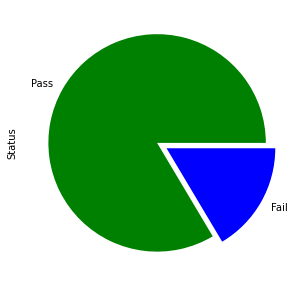

In [22]:
data=obj_vAR_df["Status"].value_counts()
colors = ['green','blue']
plot = data.plot.pie(y='Status',colors=colors, explode = [0,0.1], figsize=(5, 5))

#               80-20 MODEL VALIDATION


In [251]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(vAR_Features_Train, obj_vAR_df["Final grade_cat"], test_size = 0.2,train_size=0.8)

In [252]:
xTrain.shape

(1600, 15)

In [253]:
xTest.shape

(400, 15)

In [254]:
yTrain.shape

(1600,)

In [255]:
yTest.shape

(400,)

In [256]:
#reviewing learning algorithm  
y_pred=vAR_model.predict(xTrain)
y_pred

array([2.18038017, 0.62707042, 0.45847043, ..., 0.13020746, 4.16097751,
       0.46186586])

In [257]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yTrain,y_pred)

0.33598443512506043

In [258]:
accuracy=vAR_model.score(xTrain,yTrain)
accuracy=accuracy*100
accuracy

87.75943311435995

### Probability

In [278]:
from sklearn.model_selection import train_test_split
X = vAR_df[['Assignment 1(%)','Assignment 2(%)','Assignment 3(%)','Semester 1(%)','Semester 2(%)',
                'Backlogs','Tech-fest participation','Attendance','Quiz Voluntering',
                'Maths Olympiad','Science olympiad','Adaptiveness','Secondary Language(Reading&writing)_cat', 
                 'Social activity','Primary Language(Reading &writing)_cat']]
y = vAR_df['Final grade']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=42)


# fit Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)


# predict the Test set results
y_pred = classifier.predict(xTest)

# make the confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest, y_pred)


classifier.predict_proba(xTest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2.31498937e-01, 1.16511765e-01, 1.15288788e-01, ...,
        4.68050959e-20, 1.28207786e-19, 2.25602696e-21],
       [9.86183969e-01, 1.36889700e-02, 1.26899321e-04, ...,
        1.46670325e-40, 2.60616031e-18, 4.29322792e-17],
       [9.84589531e-01, 1.52397460e-02, 1.70554020e-04, ...,
        1.67079373e-40, 3.12653443e-18, 4.91840696e-17],
       ...,
       [5.19097029e-05, 9.99948088e-01, 1.80662000e-09, ...,
        6.02688776e-51, 1.36606008e-36, 9.42039957e-29],
       [1.38147877e-02, 9.69814483e-01, 1.45877144e-02, ...,
        3.35173321e-26, 2.84152172e-27, 1.15446039e-25],
       [1.10890866e-01, 5.63505950e-03, 5.60805909e-01, ...,
        1.46238054e-23, 8.78033118e-13, 2.51382644e-18]])

### weightage

In [289]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Assignment 1(%)']

In [290]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.69

In [292]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Assignment 2(%)']

In [293]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.65

In [295]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Assignment 3(%)']

In [296]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.6

In [297]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Semester 1(%)']

In [298]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.67

In [299]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Semester 2(%)']

In [300]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.62

In [303]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Backlogs']

In [304]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

4.29

In [305]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Tech-fest participation']

In [306]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.25

In [307]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Attendance']

In [308]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.81

In [311]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Quiz Voluntering']

In [312]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.11

In [313]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Maths Olympiad']

In [314]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

0.15

In [315]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Science olympiad']

In [316]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

0.5

In [317]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Adaptiveness']

In [318]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

0.98

In [319]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Secondary Language(Reading&writing)_cat']

In [320]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

0.39

In [321]:
distribution = obj_vAR_df["Final grade_cat"]
weights = vAR_df['Social activity']

In [322]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.52

In [324]:
distribution = obj_vAR_df["Final grade_cat"]
weights = obj_vAR_df["Primary Language(Reading &writing)_cat"]

In [325]:
def weighted_average_m1(distribution,weights ):
    numerator=sum([distribution[i]*weights[i] for i in range (len(distribution))])
    denominator=sum(weights)
    return round(numerator/denominator,2)
weighted_average_m1(distribution,weights)

1.22

### Weightage visualisation

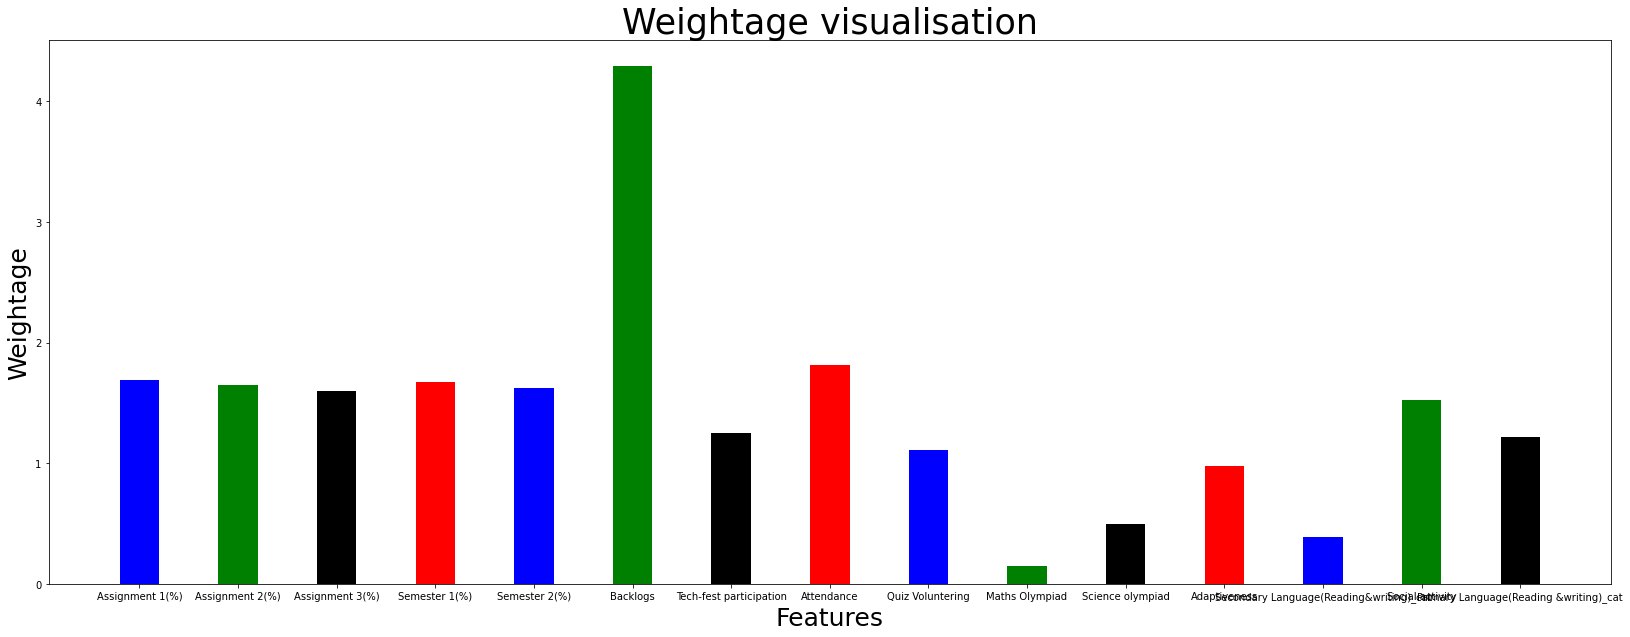

In [27]:
Features=['Assignment 1(%)','Assignment 2(%)','Assignment 3(%)','Semester 1(%)','Semester 2(%)',
                'Backlogs','Tech-fest participation','Attendance','Quiz Voluntering',
                'Maths Olympiad','Science olympiad','Adaptiveness','Secondary Language(Reading&writing)_cat', 
                 'Social activity','Primary Language(Reading &writing)_cat']

Weightage= [1.69,1.65,1.6,1.67,1.62,4.29,1.25,1.81,1.11,0.15,0.5,0.98,0.39,1.52,1.22]
   
fig = vAR_plt.figure(figsize = (28,10)) 
  
# creating the bar plot 
vAR_plt.bar(Features, Weightage, color =['blue','green','black','red'],width = 0.4) 
vAR_plt.xlabel("Features",size=25) 
vAR_plt.ylabel("Weightage",size=25) 
vAR_plt.title("Weightage visualisation",size=35) 
vAR_plt.show() 

### Confidence 

In [333]:
import scipy.stats as st

In [335]:
st.norm.interval(alpha=0.95, loc=np.mean(obj_vAR_df["Final grade_cat"]), scale=st.sem(obj_vAR_df["Final grade_cat"]))

(1.8539264412809229, 2.000073558719077)

 #                                70-30 MODEL VALIDATION 


In [265]:
xTrain, xTest, yTrain, yTest = train_test_split(vAR_Features_Train, obj_vAR_df["Final grade_cat"], test_size = 0.3,train_size=0.7)

In [266]:
xTrain.shape

(1400, 15)

In [267]:
xTest.shape

(600, 15)

In [268]:
vAR_model.fit(xTrain,yTrain)

LinearRegression()

In [269]:
y_pred=vAR_model.predict(xTrain)
y_pred

array([2.21970196, 2.25892252, 4.07516347, ..., 0.48646848, 2.21970196,
       4.6428039 ])

In [270]:
mean_squared_error(yTrain,y_pred)

0.3300509021325271

In [271]:
accuracy=vAR_model.score(xTrain,yTrain)
accuracy=accuracy*100
accuracy

87.85957245224051

### Probability

In [340]:
from sklearn.model_selection import train_test_split
X = vAR_df[['Assignment 1(%)','Assignment 2(%)','Assignment 3(%)','Semester 1(%)','Semester 2(%)',
                'Backlogs','Tech-fest participation','Attendance','Quiz Voluntering',
                'Maths Olympiad','Science olympiad','Adaptiveness','Secondary Language(Reading&writing)_cat', 
                 'Social activity','Primary Language(Reading &writing)_cat']]
y = vAR_df['Final grade']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=42)


# fit Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)


# predict the Test set results
y_pred = classifier.predict(xTest)

# make the confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest, y_pred)


classifier.predict_proba(xTest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2.31498937e-01, 1.16511765e-01, 1.15288788e-01, ...,
        4.68050959e-20, 1.28207786e-19, 2.25602696e-21],
       [9.86183969e-01, 1.36889700e-02, 1.26899321e-04, ...,
        1.46670325e-40, 2.60616031e-18, 4.29322792e-17],
       [9.84589531e-01, 1.52397460e-02, 1.70554020e-04, ...,
        1.67079373e-40, 3.12653443e-18, 4.91840696e-17],
       ...,
       [5.19097029e-05, 9.99948088e-01, 1.80662000e-09, ...,
        6.02688776e-51, 1.36606008e-36, 9.42039957e-29],
       [1.38147877e-02, 9.69814483e-01, 1.45877144e-02, ...,
        3.35173321e-26, 2.84152172e-27, 1.15446039e-25],
       [1.10890866e-01, 5.63505950e-03, 5.60805909e-01, ...,
        1.46238054e-23, 8.78033118e-13, 2.51382644e-18]])

### Confidence

In [ ]:
import scipy.stats as st

In [342]:
st.norm.interval(alpha=0.95, loc=np.mean(obj_vAR_df["Final grade_cat"]), scale=st.sem(obj_vAR_df["Final grade_cat"]))

(1.8539264412809229, 2.000073558719077)

## 90-10 MODEL VALIDATION


In [354]:
xTrain, xTest, yTrain, yTest = train_test_split(vAR_Features_Train, obj_vAR_df["Final grade_cat"], test_size = 0.1,train_size=0.9)

In [355]:
xTrain.shape

(1800, 15)

In [356]:
xTest.shape

(200, 15)

In [357]:
vAR_model.fit(xTrain,yTrain)

LinearRegression()

In [358]:
y_pred=vAR_model.predict(xTrain)
y_pred

array([ 4.08862389,  0.45180984,  0.62460576, ...,  4.08862389,
        2.33890187, -0.24459419])

In [359]:
mean_squared_error(yTrain,y_pred)

0.33300322735506105

In [360]:
accuracy=vAR_model.score(xTrain,yTrain)
accuracy=accuracy*100
accuracy

87.90056905048223

### Probability

In [343]:
from sklearn.model_selection import train_test_split
X = vAR_df[['Assignment 1(%)','Assignment 2(%)','Assignment 3(%)','Semester 1(%)','Semester 2(%)',
                'Backlogs','Tech-fest participation','Attendance','Quiz Voluntering',
                'Maths Olympiad','Science olympiad','Adaptiveness','Secondary Language(Reading&writing)_cat', 
                 'Social activity','Primary Language(Reading &writing)_cat']]
y = vAR_df['Final grade']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=42)


# fit Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)


# predict the Test set results
y_pred = classifier.predict(xTest)

# make the confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest, y_pred)


classifier.predict_proba(xTest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2.31498937e-01, 1.16511765e-01, 1.15288788e-01, ...,
        4.68050959e-20, 1.28207786e-19, 2.25602696e-21],
       [9.86183969e-01, 1.36889700e-02, 1.26899321e-04, ...,
        1.46670325e-40, 2.60616031e-18, 4.29322792e-17],
       [9.84589531e-01, 1.52397460e-02, 1.70554020e-04, ...,
        1.67079373e-40, 3.12653443e-18, 4.91840696e-17],
       ...,
       [5.19097029e-05, 9.99948088e-01, 1.80662000e-09, ...,
        6.02688776e-51, 1.36606008e-36, 9.42039957e-29],
       [1.38147877e-02, 9.69814483e-01, 1.45877144e-02, ...,
        3.35173321e-26, 2.84152172e-27, 1.15446039e-25],
       [1.10890866e-01, 5.63505950e-03, 5.60805909e-01, ...,
        1.46238054e-23, 8.78033118e-13, 2.51382644e-18]])

### Confidence

In [344]:
import scipy.stats as st

In [345]:
st.norm.interval(alpha=0.95, loc=np.mean(obj_vAR_df["Final grade_cat"]), scale=st.sem(obj_vAR_df["Final grade_cat"]))

(1.8539264412809229, 2.000073558719077)

## Accuracy visualisation

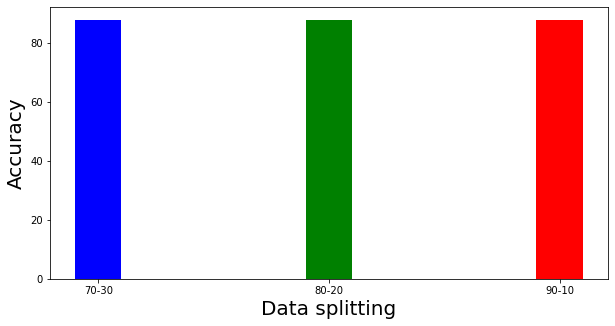

In [5]:
Validation = ['70-30','80-20','90-10'] 
Accuracy = [87.85,87.75,87.90] 
   
fig = vAR_plt.figure(figsize = (10,5)) 
  
# creating the bar plot 
vAR_plt.bar(Validation,Accuracy, color =['blue','green','red'],width = 0.2) 
  
vAR_plt.xlabel("Data splitting",size=20) 
vAR_plt.ylabel("Accuracy",size=20) 
 
vAR_plt.show() 